In [62]:
# Importing Required Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np

In [63]:
# Reading data
data = pd.read_csv('/Users/hoosiersaikap251/dataviz/docs/Final_Data.csv')
data.head(5)

,ID,Upvotes,Submission Date,Status,est_dev_time_days,complexity_score,num_teams_required,resource_cost_usd,infra_dependencies_count,tech_risk_score,...,aligns_with_okrs,supports_key_initiative,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score,Title,Description
0,f7121191-cbbf-4f74-8256-024ea3987b2c,343,2024-05-17,On Hold,34,1,3,156494,4,1,...,True,Automation,True,5,True,False,False,2,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...
1,a39a9628-4938-4ccf-9f15-122aed064631,199,2025-01-16,On Hold,80,2,3,175066,2,3,...,False,NaN,True,4,True,False,True,5,Cloud-Based Ago Analyzer,Cloud-Based Ago Analyzer is focused on optimiz...
2,e2eb83ea-cf0f-48d0-b688-70f646ff514a,262,2024-07-08,Completed,23,3,3,69152,2,5,...,False,Sustainability,False,5,False,True,True,1,Intelligent Face Bot,Intelligent Face Bot is focused on streamlinin...
3,356a87f2-1297-4740-8dd2-9c2fc687630d,129,2024-05-28,On Hold,13,4,1,98541,4,2,...,False,Sustainability,False,2,True,True,False,5,AI-Powered Dog System,AI-Powered Dog System is focused on reducing m...
4,d20030cb-2356-4234-8358-2c3e87e902dc,365,2024-05-13,On Hold,27,2,3,78405,5,2,...,False,NaN,False,5,False,True,True,3,Predictive Since Agent,Predictive Since Agent is focused on improving...


Taking Required Metrics for Evaluating Features Importance i.e. (giving weights to features according to importance instead manually assigning them) related to Cost Metric.

| Feature Name              | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| est_dev_time_days         | Estimated development time in days                                          |
| complexity_score          | Subjective complexity score (1-5 scale or categorical)                      |
| num_teams_required        | Number of cross-functional teams required                                   |
| resource_cost_usd         | Estimated cost of human resources in USD                                    |
| infra_dependencies_count  | Number of infrastructure or API dependencies                                |
| tech_risk_score           | Technical risk score (1-5)                                                  |
| design_effort_days        | Estimated time needed from UX/UI design in days                             |
| qa_effort_days            | Estimated QA and testing effort in days                                     |
| deployment_complexity     | Deployment difficulty level (e.g., Low, Medium, High)                       |
| integration_needed        | Whether the idea needs integration with external systems (True/False)       |


In [64]:
# Taking Cost Metric Features
df_cost = data[['Title','Description','est_dev_time_days', 'complexity_score', 'num_teams_required', 
                'resource_cost_usd', 'infra_dependencies_count', 'tech_risk_score', 
                'design_effort_days', 'qa_effort_days', 'deployment_complexity', 
                'integration_needed']].copy()
df_cost['deployment_complexity'] = df_cost['deployment_complexity'].replace({'High': 1, 'Medium': 0, 'Low': 0}).astype(int)
df_cost['integration_needed'] = df_cost['integration_needed'].astype(int)
df_cost.head(5)

/var/folders/jr/cx9v05mj76767q_pxc111nvr0000gn/T/ipykernel_12844/2934079348.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cost['deployment_complexity'] = df_cost['deployment_complexity'].replace({'High': 1, 'Medium': 0, 'Low': 0}).astype(int)


,Title,Description,est_dev_time_days,complexity_score,num_teams_required,resource_cost_usd,infra_dependencies_count,tech_risk_score,design_effort_days,qa_effort_days,deployment_complexity,integration_needed
0,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...,34,1,3,156494,4,1,11,21,1,0
1,Cloud-Based Ago Analyzer,Cloud-Based Ago Analyzer is focused on optimiz...,80,2,3,175066,2,3,24,40,0,1
2,Intelligent Face Bot,Intelligent Face Bot is focused on streamlinin...,23,3,3,69152,2,5,14,39,0,0
3,AI-Powered Dog System,AI-Powered Dog System is focused on reducing m...,13,4,1,98541,4,2,29,43,1,0
4,Predictive Since Agent,Predictive Since Agent is focused on improving...,27,2,3,78405,5,2,21,30,1,0


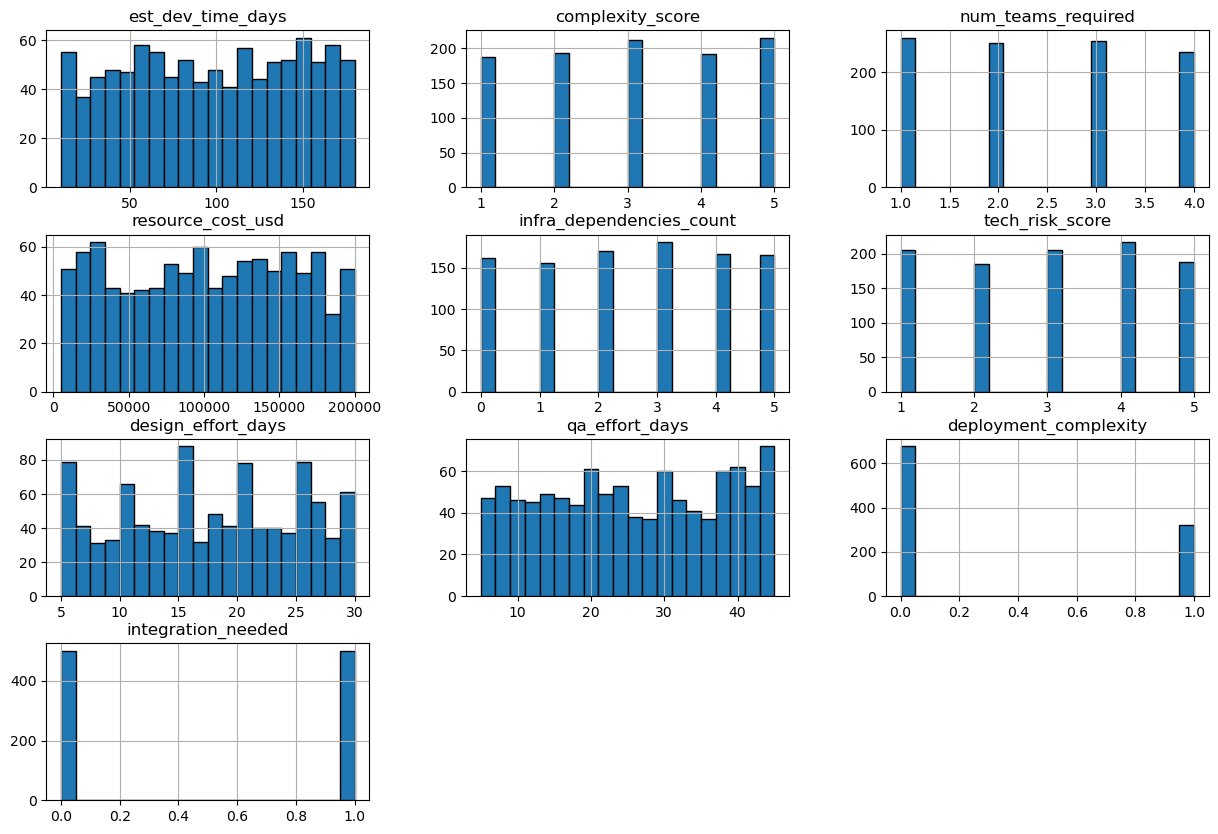

In [65]:
# Checking Skewness of the data 
df_cost.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.show()

In [66]:
# Normalizing the Data based on Min-Max Scaling 
numerical_columns = df_cost.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler(feature_range=(0, 1))
df_cost_normalized = df_cost.copy()
df_cost_normalized[numerical_columns] = scaler.fit_transform(df_cost[numerical_columns])

In [67]:
# Keeping the Target Label Randomly (Although it will depend upon the labeled data from the upstream)
import numpy as np
df_cost_normalized['target'] = np.random.rand(len(df_cost_normalized))

In [68]:
# Train, Val and Test Split For Training Random Forest Model
from sklearn.model_selection import train_test_split

df_train,df_temp = train_test_split(df_cost_normalized, train_size=800, random_state=42)
df_val, df_test = train_test_split(df_cost_normalized, test_size=100, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Training the Model
X = df_train[numerical_columns]
y = df_train['target']


rf_regressor = RandomForestRegressor(n_estimators=100,random_state=42)
rf_regressor.fit(X, y)

# Val Set
X_val = df_val[numerical_columns]
y_val = df_val['target']
y_pred = rf_regressor.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print(f"MSE: {mse}")

MSE: 0.01880696121668463


Feature importance indicates how much each feature contributes to the predictive power of the model.
Higher importance values mean the feature plays a bigger role in the model’s decisions.
This helps with model interpretability and can guide feature selection or engineering.

In [70]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

importances_df = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                    Feature  Importance
3         resource_cost_usd    0.199819
0         est_dev_time_days    0.190340
7            qa_effort_days    0.147996
6        design_effort_days    0.142494
4  infra_dependencies_count    0.082762
1          complexity_score    0.071365
5           tech_risk_score    0.065623
2        num_teams_required    0.052993
9        integration_needed    0.024022
8     deployment_complexity    0.022586


In [71]:
importances_df.to_csv('feature_importances_cost.csv', index=False)

In [72]:
import altair as alt

# Create a histogram for feature importance
chart = alt.Chart(importances_df).mark_bar().encode(
    x=alt.X('Feature', sort='-y', title='Features'),
    y=alt.Y('Importance', scale=alt.Scale(domain=[0, 1]), title='Importance'),
    tooltip=['Feature', 'Importance']
).properties(
    title='Feature Importance Histogram',
    width=600,
    height=400
)

chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [73]:
feature_weights = pd.Series(feature_importances, index=X.columns)

In [74]:
df_train['cost_target'] = df_train[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)


In [75]:
# Test Set
X_val = df_test[numerical_columns]
y_test = df_test['target']
y_pred = rf_regressor.predict(X_val)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.07827043373784162


In [76]:
# Assigning Weights to the Features for whole Dataset
df_all_Cost=df_cost_normalized.copy()
df_all_Cost['Cost_Score'] = df_all_Cost[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)

In [77]:
df_all_Cost.head(1)

,Title,Description,est_dev_time_days,complexity_score,num_teams_required,resource_cost_usd,infra_dependencies_count,tech_risk_score,design_effort_days,qa_effort_days,deployment_complexity,integration_needed,target,Cost_Score
0,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...,0.141176,0.0,0.666667,0.777348,0.8,0.0,0.24,0.4,1.0,0.0,0.803563,0.399721


In [78]:
df_all_Cost.to_csv('df_all_Cost.csv', index=False)